In [2]:
pip install doubleml

     |████████████████████████████████| 115 kB 8.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
from scipy import stats
from scipy.stats import bernoulli
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from doubleml import DoubleMLData
from doubleml import DoubleMLPLR

# simple simulation to ensure data generation is working

In [70]:
n_samples = 1000000
n_features = 3
treatment_prob = 0.9
trt_effect = 0.5

x = np.random.randn(n_samples, n_features)
D =  bernoulli.rvs(p = treatment_prob,size=n_samples) # treatment var
dx = np.column_stack((D,x))
dx[:5]

array([[ 1.        , -0.73179837,  1.03372177,  0.33728601],
       [ 1.        ,  1.07246286,  1.94706036,  2.07384913],
       [ 1.        , -0.17317872,  0.54318994, -0.10368289],
       [ 1.        , -0.97418801,  0.3628086 ,  0.7987302 ],
       [ 1.        , -2.07416472, -0.2682612 ,  0.85259863]])

In [71]:
weights = np.append(trt_effect,stats.norm.rvs(0, 1, size = n_features))
print(weights)
Y = np.dot(dx,weights.T) + np.random.rand()
model = sm.OLS(Y, dx)
results = model.fit()
print(results.summary())

[ 0.5        -1.10299573 -0.73572172 -0.05051984]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          1.367e+07
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:07:22   Log-Likelihood:                         -1473.4
No. Observations:             1000000   AIC:                                      2955.
Df Residuals:                  999996   BIC:                                      3002.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

In [72]:
resultsdf = pd.DataFrame()

for i in range(10):
    n_samples = 1000000
    n_features = 3
    treatment_prob = 0.9
    trt_effect = 0.5
    x = np.random.randn(n_samples, n_features)
    D =  bernoulli.rvs(p = treatment_prob,size=n_samples) # treatment var
    dx = np.column_stack((D,x))
    weights = np.append(trt_effect,stats.norm.rvs(0, 1, size = n_features))
    Y = np.dot(dx,weights.T) + np.random.rand()
    model = sm.OLS(Y, dx)
    results = model.fit()
    temp_df = pd.DataFrame({'coef': results.params[0],'CI_L':results.conf_int()[0][0],'CI_U':results.conf_int()[0][1],'bse0': results.bse[0], 'bse1': results.bse[1],'bse2':results.bse[2],'bse3':results.bse[3]}, index = [i])
    resultsdf = resultsdf.append(temp_df)

In [73]:
resultsdf

,coef,CI_L,CI_U,bse0,bse1,bse2,bse3
0,0.963019,0.962717,0.963321,0.000154,0.000146,0.000146,0.000146
1,1.471062,1.470427,1.471696,0.000324,0.000307,0.000307,0.000307
2,0.889366,0.889111,0.889620,0.000130,0.000123,0.000123,0.000123
3,0.998406,0.998080,0.998731,0.000166,0.000157,0.000158,0.000157
4,0.619916,0.619838,0.619995,0.000040,0.000038,0.000038,0.000038
5,0.507892,0.507887,0.507898,0.000003,0.000003,0.000002,0.000002
6,0.650177,0.650079,0.650275,0.000050,0.000048,0.000048,0.000047
7,0.985342,0.985026,0.985659,0.000161,0.000153,0.000153,0.000153
8,0.851392,0.851162,0.851622,0.000117,0.000111,0.000111,0.000111
9,1.364377,1.363813,1.364941,0.000288,0.000273,0.000273,0.000273


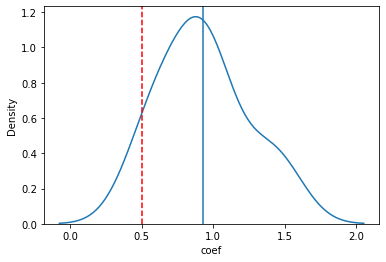

In [77]:
sns.kdeplot(resultsdf.coef)
plt.axvline(resultsdf.coef.mean())
plt.axvline(trt_effect, color = 'r', linestyle='--')

## adding colinearity

Generate same data but add a copy of the last column. Duplicate this along with the weights and check VIF

In [130]:
n_samples = 1000
n_features = 3
treatment_prob = 0.9
trt_effect = 0.5

x = np.random.randn(n_samples, n_features)
D =  bernoulli.rvs(p = treatment_prob,size=n_samples) # treatment var

#copy last feature
dx = np.column_stack((D,x,x[:,-1]))

#dx = np.column_stack((D,x,D)) #copy D
dx[:10]

array([[ 1.        ,  0.7037551 ,  0.6531598 ,  0.18647645,  0.18647645],
       [ 1.        , -0.55968596, -1.01748581, -0.5080576 , -0.5080576 ],
       [ 0.        , -0.05358517, -0.04192262, -0.70847158, -0.70847158],
       [ 0.        , -1.2691044 ,  1.04554665, -0.6399689 , -0.6399689 ],
       [ 1.        ,  0.31384431,  0.93674306, -0.28516928, -0.28516928],
       [ 1.        ,  1.46063587,  0.9869714 ,  0.09232227,  0.09232227],
       [ 1.        , -0.86031112,  1.56889366,  0.63020583,  0.63020583],
       [ 1.        , -0.3765259 ,  0.73643475,  0.38488306,  0.38488306],
       [ 1.        ,  1.3859589 , -0.11903856, -0.21479519, -0.21479519],
       [ 0.        ,  0.90046958, -0.26814985, -0.66476813, -0.66476813]])

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dx_df = pd.DataFrame(dx, columns = ["intercept","x1","x2","x3","x3+2"])

vif = pd.DataFrame()
vif["variables"] = dx_df.columns
vif["VIF"] = [variance_inflation_factor(dx_df.values, i) for i in range(dx_df.shape[1])]
vif

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,intercept,1.003285
1,x1,1.002945
2,x2,1.000742
3,x3,inf
4,x3+2,inf


In [55]:
weights =  np.append(trt_effect, stats.norm.rvs(0, 1, size = n_features)) # +1 due to the duplicated feature
weights = np.append(weights,weights[-1]) #add duplicate weight for duplicate feature
print(weights)

Y = np.dot(dx,weights.T) + np.random.rand()

model = sm.OLS(Y, dx)
results = model.fit()
print(results.summary())

[ 0.5        -0.59511631 -0.39938747  1.00550115  1.00550115]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.476e+07
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:54:38   Log-Likelihood:                     -2.4736e+05
No. Observations:             1000000   AIC:                                  4.947e+05
Df Residuals:                  999995   BIC:                                  4.948e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|    

Sanity check complete. Standard error increased. Function working ok!

In [78]:
resultsdf = pd.DataFrame()

for i in range(10):
    n_samples = 1000000
    n_features = 3
    treatment_prob = 0.9
    trt_effect = 0.5
    x = np.random.randn(n_samples, n_features)
    D =  bernoulli.rvs(p = treatment_prob,size=n_samples) # treatment var
    dx = np.column_stack((D,x,x[:,2]))
    weights = np.append(trt_effect,stats.norm.rvs(0, 1, size = n_features))
    weights = np.append(weights,weights[-1]) #add duplicate weight for duplicate feature
    Y = np.dot(dx,weights.T) + np.random.rand()
    model = sm.OLS(Y, dx)
    results = model.fit()
    temp_df = pd.DataFrame({'coef': results.params[0],'CI_L':results.conf_int()[0][0],'CI_U':results.conf_int()[0][1],'bse0': results.bse[0], 'bse1': results.bse[1],'bse2':results.bse[2],'bse3':results.bse[3],'bse4':results.bse[4]}, index = [i])
    resultsdf = resultsdf.append(temp_df)

In [79]:
resultsdf

,coef,CI_L,CI_U,bse0,bse1,bse2,bse3,bse4
0,1.235937,1.235457,1.236416,0.000245,0.000232,0.000232,0.000116,0.000116
1,0.658209,0.658105,0.658312,0.000053,0.000050,0.000050,0.000025,0.000025
2,0.908872,0.908605,0.909138,0.000136,0.000129,0.000129,0.000065,0.000065
3,1.042174,1.041821,1.042527,0.000180,0.000171,0.000171,0.000085,0.000085
4,1.362958,1.362393,1.363523,0.000288,0.000274,0.000274,0.000137,0.000137
5,1.241818,1.241336,1.242301,0.000246,0.000234,0.000234,0.000117,0.000117
6,0.641636,0.641544,0.641729,0.000047,0.000045,0.000045,0.000022,0.000022
7,1.412429,1.411833,1.413026,0.000304,0.000289,0.000289,0.000144,0.000144
8,0.774242,0.774063,0.774421,0.000091,0.000087,0.000087,0.000043,0.000043
9,0.738168,0.738013,0.738323,0.000079,0.000075,0.000075,0.000038,0.000038


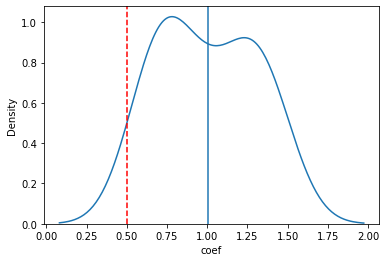

In [81]:
sns.kdeplot(resultsdf.coef)
plt.axvline(resultsdf.coef.mean())
plt.axvline(trt_effect, color = 'r', linestyle='--')

## colinearity with the treatment variable

In [82]:
resultsdf = pd.DataFrame()

for i in range(10):
    n_samples = 1000000
    n_features = 3
    treatment_prob = 0.9
    trt_effect = 0.5
    x = np.random.randn(n_samples, n_features)
    D =  bernoulli.rvs(p = treatment_prob,size=n_samples) # treatment var
    dx = np.column_stack((D,x,D))
    weights = np.append(trt_effect,stats.norm.rvs(0, 1, size = n_features)) #
    weights = np.append(weights,trt_effect)
    Y = np.dot(dx,weights.T) + np.random.rand()
    model = sm.OLS(Y, dx)
    results = model.fit()
    temp_df = pd.DataFrame({'coef': results.params[0],'CI_L':results.conf_int()[0][0],'CI_U':results.conf_int()[0][1],'bse0': results.bse[0], 'bse1': results.bse[1],'bse2':results.bse[2],'bse3':results.bse[3],'bse4':results.bse[4]}, index = [i])
    resultsdf = resultsdf.append(temp_df)

In [83]:
resultsdf

,coef,CI_L,CI_U,bse0,bse1,bse2,bse3,bse4
0,4.506733e+06,-3.081435e+09,3.090449e+09,1.574487e+09,0.000012,0.000012,0.000012,1.574487e+09
1,-1.610010e+11,-2.610642e+11,-6.093789e+10,5.105350e+10,0.000271,0.000271,0.000271,5.105350e+10
2,-2.909637e+07,-6.101393e+10,6.095574e+10,3.111525e+10,0.000076,0.000076,0.000076,3.111525e+10
3,9.988702e+06,-4.505592e+10,4.507590e+10,2.299321e+10,0.000190,0.000190,0.000190,2.299321e+10
4,-1.384082e+06,-2.950196e+09,2.947428e+09,1.504522e+09,0.000017,0.000017,0.000017,1.504522e+09
5,2.589995e+07,-5.309740e+10,5.314920e+10,2.710419e+10,0.000285,0.000285,0.000285,2.710419e+10
6,2.643272e+07,-4.151198e+10,4.156485e+10,2.119343e+10,0.000239,0.000239,0.000239,2.119343e+10
7,-1.156945e+06,-4.804183e+10,4.803951e+10,2.451097e+10,0.000253,0.000253,0.000252,2.451097e+10
8,2.921218e+07,-4.273206e+10,4.279049e+10,2.181735e+10,0.000216,0.000216,0.000216,2.181735e+10
9,2.498348e+07,-1.845565e+10,1.850562e+10,9.429058e+09,0.000090,0.000090,0.000090,9.429058e+09


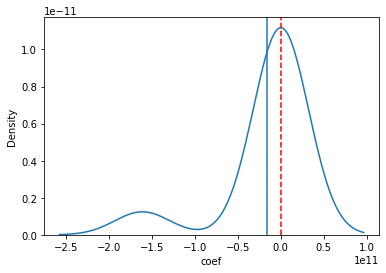

In [84]:
sns.kdeplot(resultsdf.coef)
plt.axvline(resultsdf.coef.mean())
plt.axvline(trt_effect, color = 'r', linestyle='--')

## Even more collinearity

In [118]:
def gen_features_doublefeats(n_samples,n_features, trt_effect,treatment_prob, distribution, noise,seed):
    """
    generates complete duplicate features and weights of X features
    """
    if distribution == 'gaussian':
        x = np.random.randn(n_samples, n_features)
        #create identical features
        X = np.repeat(x,2, axis = 1)
        D =  bernoulli.rvs(p = treatment_prob,size=n_samples) # treatment var
        dx = np.column_stack((D,X))
        weights = np.append(trt_effect,stats.norm.rvs(0, 1, size = n_features))
        weights = np.append(weights,weights[1:])
        Y = np.dot(dx,weights.T) + np.random.rand()
        if noise >0.0:
            Y += stats.norm.rvs(loc = 0, scale=noise,size=Y.shape)     
    
    elif distribution == 'bernoulli':
        # generate X features
        p_vec = np.random.uniform(size = int(n_features/2))
        x = stats.bernoulli.rvs(p = p_vec, size = [n_samples,int(n_features/2)])
        X = np.repeat(x,2, axis = 1)
        
        #add the treatment var into X data        
        D = bernoulli.rvs(p = treatment_prob,size=n_samples) # treatment var
        dx = np.column_stack((D,X))
        #generate weights
        weights = np.append(trt_effect,stats.norm.rvs(0, 1, size = int(n_features/2)))
        weights = np.append(weights,weights[1:])
        Y = np.dot(dx,weights.T) + np.random.rand()
        #implement noise for bernoulli with noise = p(flip bit)
        if noise >0.0:
            #Y_multiplier = [-1 if random.random() < noise else 1 for i in Y]
            #Y = Y * Y_multiplier
            Y += stats.norm.rvs(loc = 0, scale=noise,size=Y.shape)  
            
    else:
        print("Not a valid distribution")
    
    return X,dx,weights, Y, D

In [121]:
n_samples = 1000000
n_features = 4
treatment_prob = 0.9
trt_effect = 0.5

resultsdf = pd.DataFrame()

for i in range(10):
    X,dx,weights, Y, D = gen_features_doublefeats(n_samples,n_features, trt_effect,treatment_prob, 'gaussian', 0,123)
    model = sm.OLS(Y, dx)
    results = model.fit()
    temp_df = pd.DataFrame({'coef': results.params[0],'CI_L':results.conf_int()[0][0],'CI_U':results.conf_int()[0][1],'bse0': results.bse[0], 'bse1': results.bse[1],'bse2':results.bse[2],'bse3':results.bse[3],'bse4':results.bse[4]}, index = [i])
    resultsdf = resultsdf.append(temp_df)

Text(0.5, 1.0, 'Gaussian 1M samples, 8 features (4 duplicated) ')

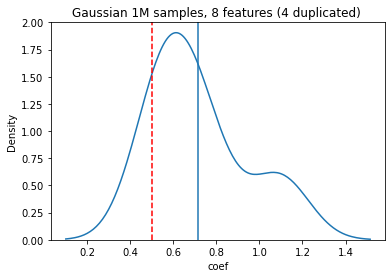

In [125]:
sns.kdeplot(resultsdf.coef)
plt.axvline(resultsdf.coef.mean())
plt.axvline(trt_effect, color = 'r', linestyle='--')
plt.title("Gaussian 1M samples, 8 features (4 duplicated) ")

In [127]:
resultsdf = pd.DataFrame()

for i in range(10):
    X,dx,weights, Y, D = gen_features_doublefeats(n_samples,n_features, trt_effect,treatment_prob, 'bernoulli', 0,123)
    model = sm.OLS(Y, dx)
    results = model.fit()
    temp_df = pd.DataFrame({'coef': results.params[0],'CI_L':results.conf_int()[0][0],'CI_U':results.conf_int()[0][1],'bse0': results.bse[0], 'bse1': results.bse[1],'bse2':results.bse[2],'bse3':results.bse[3],'bse4':results.bse[4]}, index = [i])
    resultsdf = resultsdf.append(temp_df)

Text(0.5, 1.0, 'Bernoulli 1M samples, 8 features (4 duplicated) ')

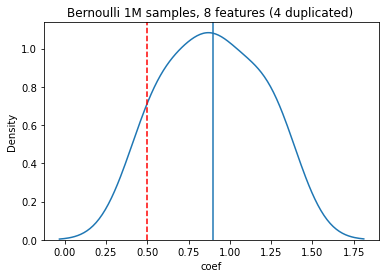

In [128]:
sns.kdeplot(resultsdf.coef)
plt.axvline(resultsdf.coef.mean())
plt.axvline(trt_effect, color = 'r', linestyle='--')
plt.title("Bernoulli 1M samples, 8 features (4 duplicated) ")